In [1]:
from learning_models import *
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

1 Exploratory Data Analysis
================

In [2]:
df = pd.read_csv('winequalityN.csv')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [4]:
#Show the description of white wine data
white = df[df['type']=='white']
white.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4898 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  4898 non-null   object 
 1   fixed acidity         4890 non-null   float64
 2   volatile acidity      4891 non-null   float64
 3   citric acid           4896 non-null   float64
 4   residual sugar        4896 non-null   float64
 5   chlorides             4896 non-null   float64
 6   free sulfur dioxide   4898 non-null   float64
 7   total sulfur dioxide  4898 non-null   float64
 8   density               4898 non-null   float64
 9   pH                    4891 non-null   float64
 10  sulphates             4896 non-null   float64
 11  alcohol               4898 non-null   float64
 12  quality               4898 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 535.7+ KB


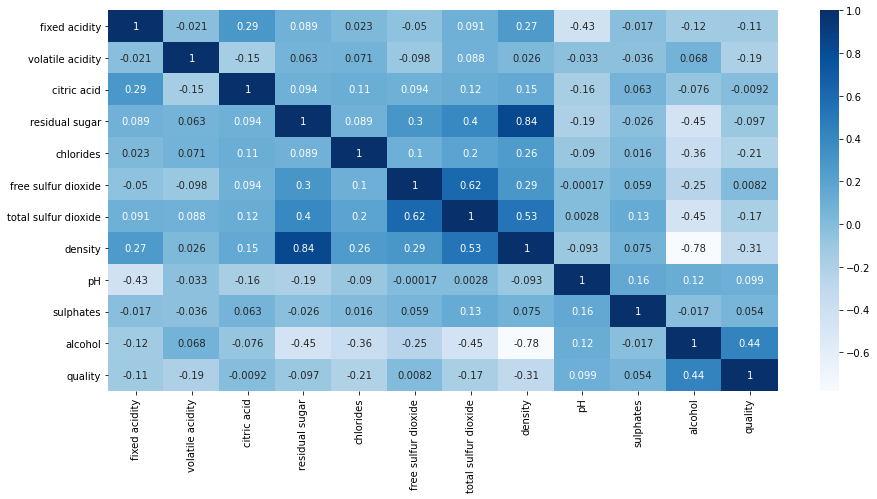

In [5]:
#Show the correlation between attributes
#high correlated attributes can be removed if overfitting occurs in the model building later on - residual sugar and density？total and free sulfur dioxide
plt.figure(figsize=(15,7))
sns.heatmap(white.corr(),annot=True,cmap='Blues')
plt.show()

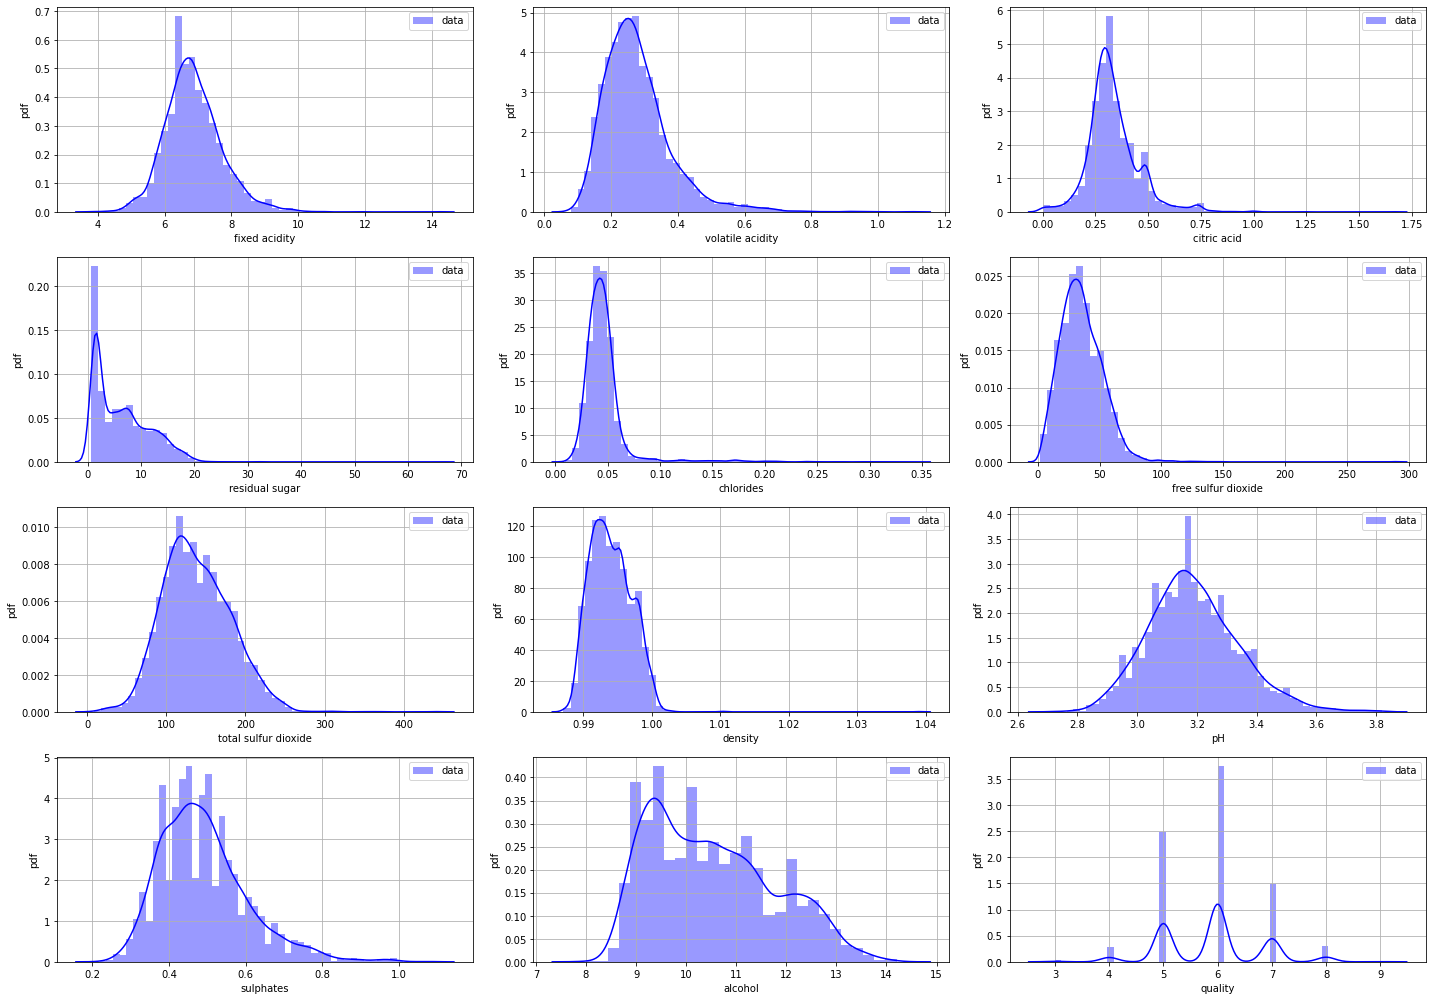

In [6]:
plt.figure(figsize=(20,14))
for i, col in enumerate(list(df.iloc[:,1:].columns.values)):
    plt.subplot(4,3,i+1)
    sns.distplot(white[col],color='b',kde=True, label='data')
    plt.ylabel('pdf')
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout()

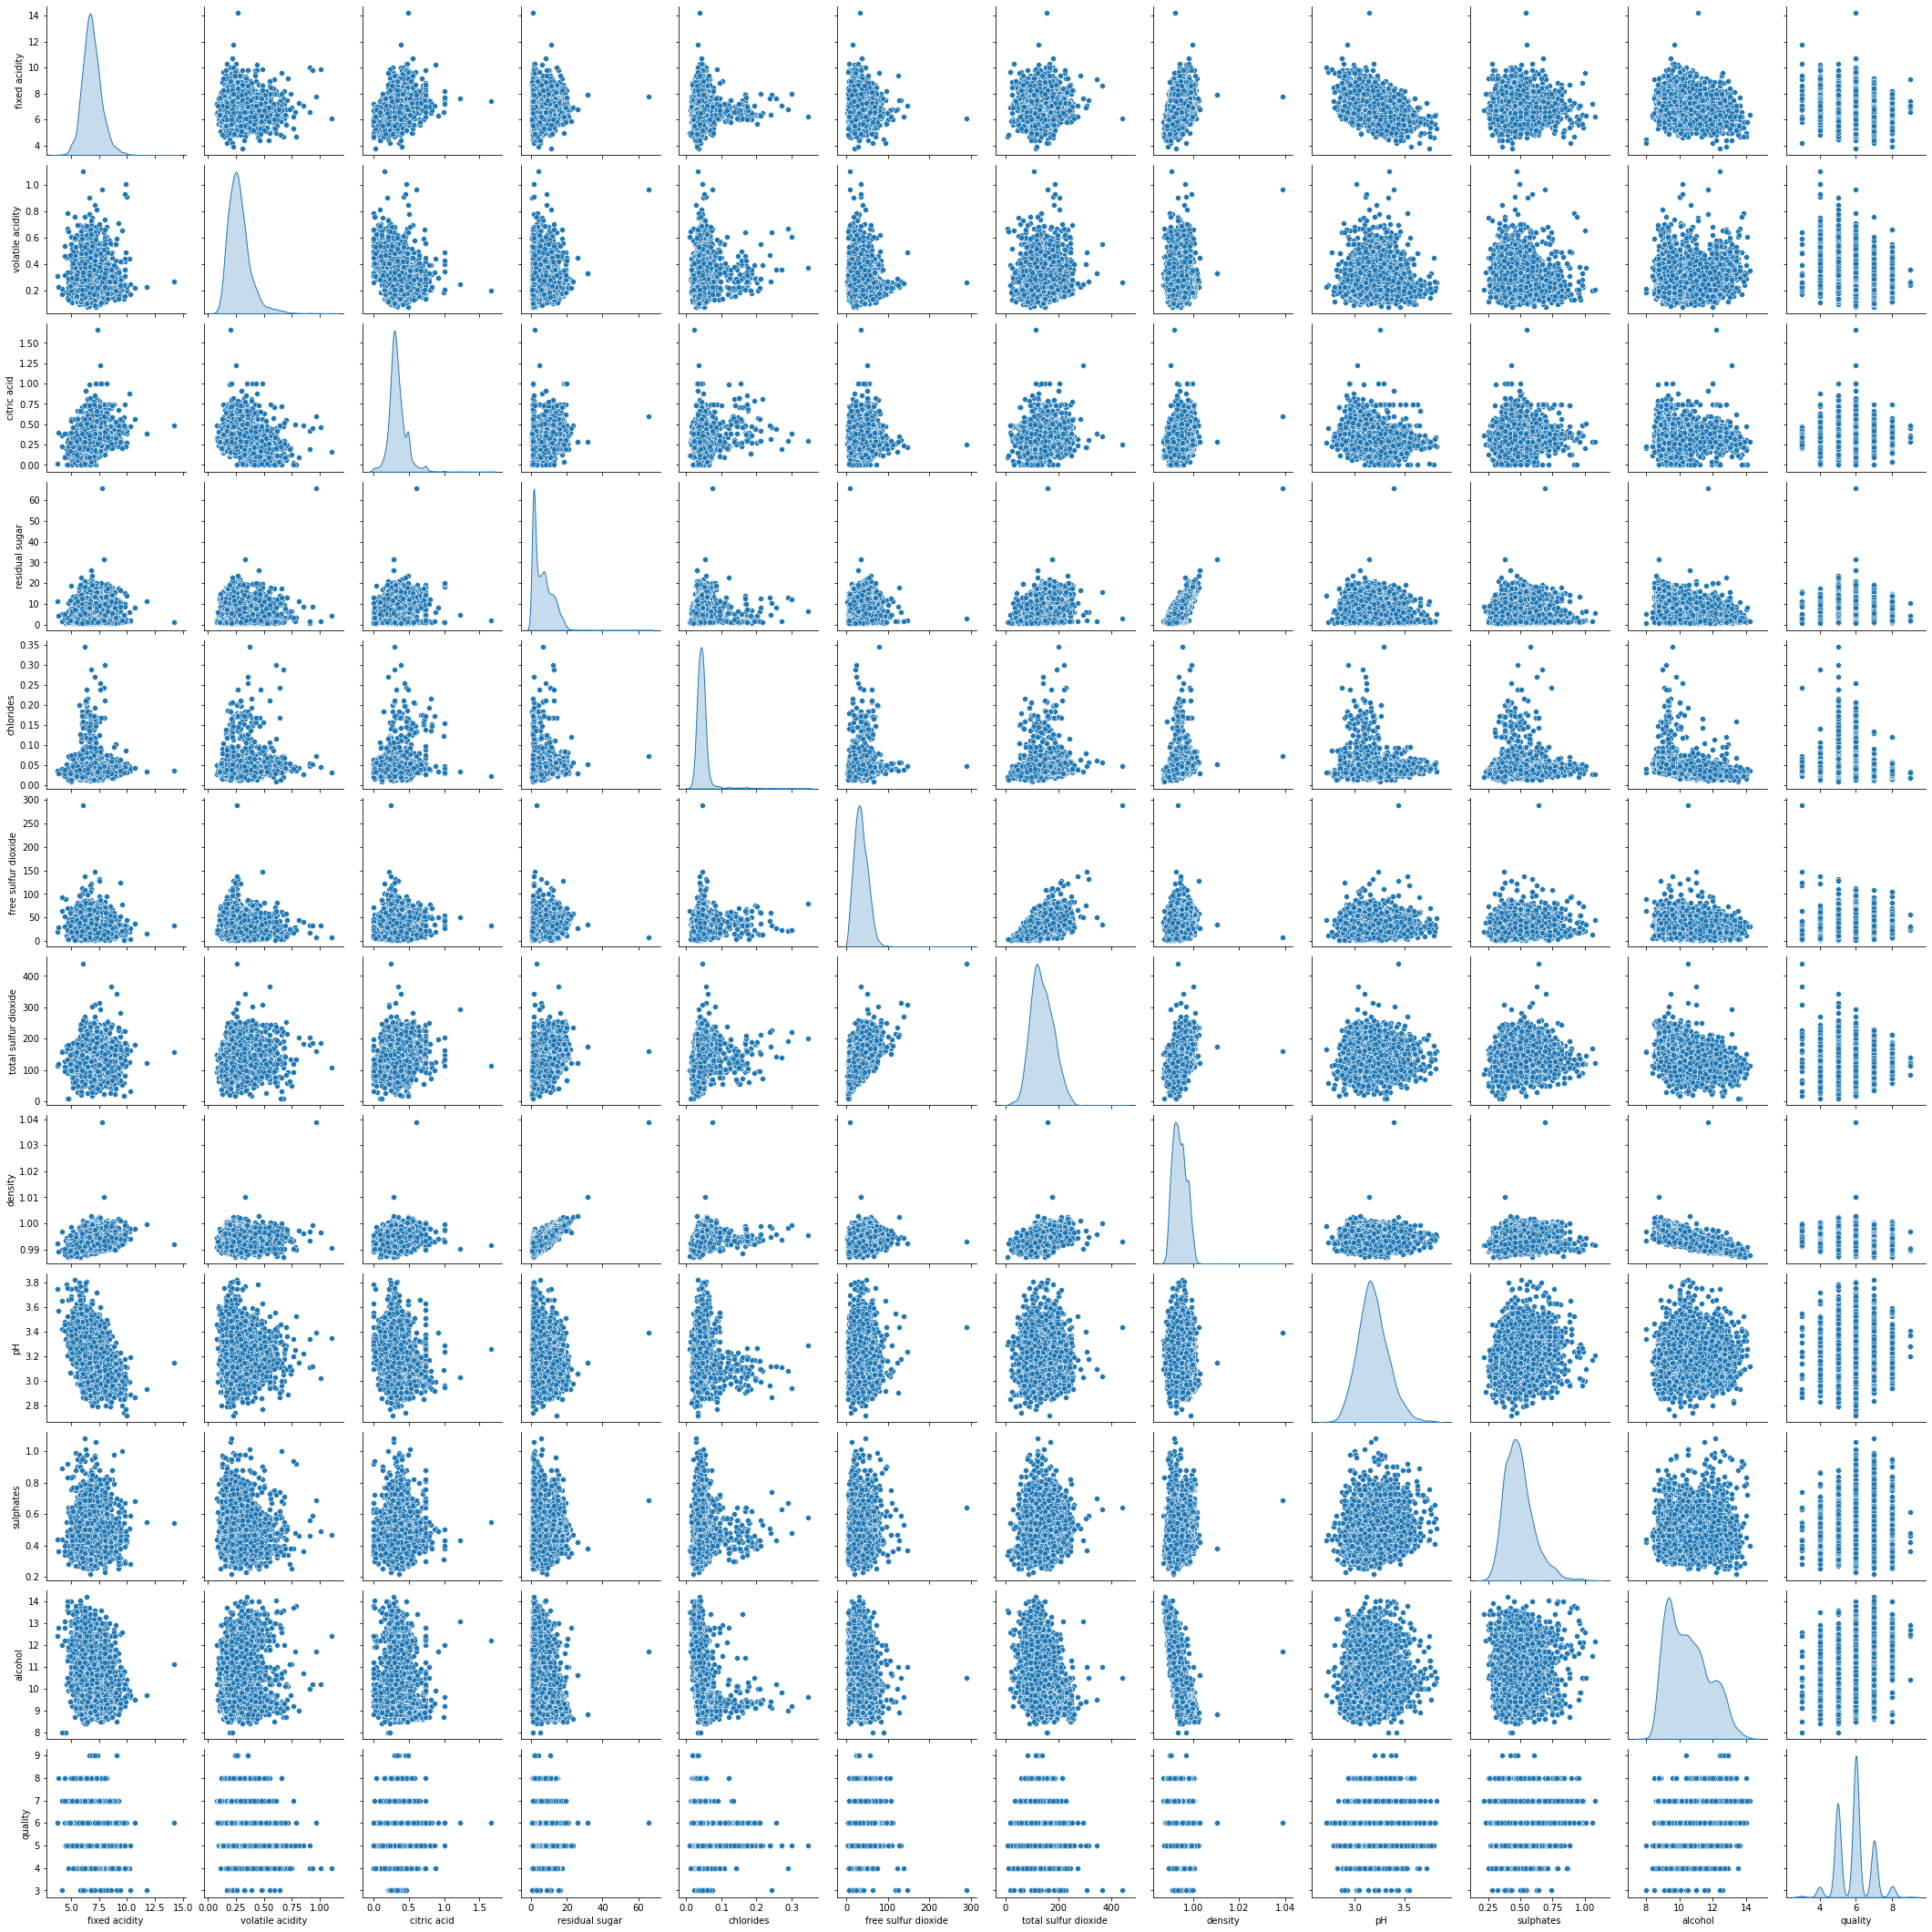

In [7]:
sns.pairplot(white,kind="scatter",diag_kind="kde")

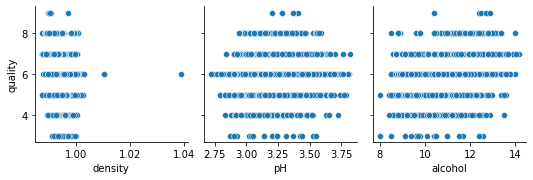

In [8]:
sns.pairplot(white,x_vars=['density','pH','alcohol'],y_vars=['quality'],kind="scatter",diag_kind="kde")

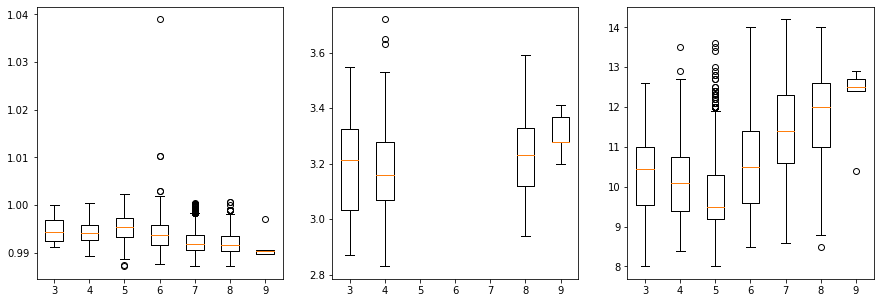

In [38]:
feature_ticks = ['density','pH','alcohol']
plt.figure(figsize=(15,5))
for i in range(len(feature_ticks)):
    #sns.jointplot(data=white,x=feature_ticks[i],y='quality')
    plt.subplot(1,3,i+1)
    feature_groups = [frame[feature_ticks[i]].values for label,frame in white.groupby('quality') if label>=3]
    plt.boxplot(feature_groups,meanline=True,labels=[label for label,frame in white.groupby('quality') if label>=3])

2 Preprocessing
==============

In [10]:
# Set parameters
dflt_param = Parameters()

# Data cleaning
data = df.loc[df['type']=='white']
data.dropna(inplace=True)
y_data = data['quality'].values
X_data = data.loc[:,'fixed acidity':'alcohol'].values

# Train-test split
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_data, y_data, train_size=0.8, random_state=0)

In [11]:
# Model Specification
AllModels = [LeastSquares(),Polynomial(),Lasso(),Ridge(),DecisionTree(),RandomForest(),KNearestNeighbors()]

For feature engineering, we process features from raw data for the following models:
* Adding an offset: LeastSquares, Polynomial
* Adding 2nd degree polynomials: Polynomial
* Standardizing data: Lasso, Ridge, K-NN

See the code in *learning_models.py* for more details.

3 Learning
=========

In [12]:
AllNames = []
AllMSE = []

for iModel in AllModels:
    AllNames.append(iModel.name)
    iModel.train(y_train,X_train)
    AllMSE.append(iModel.predict_error(y_test,X_test))

result_df = pd.DataFrame({'MSE':AllMSE},index=AllNames)

In [13]:
result_df

,MSE
LeastSquares,0.571834
Polynomial,0.571834
Lasso,0.784307
Ridge,0.571993
DecisionTree,0.557257
RandomForest,0.410802
KNearestNeighbors,0.620842


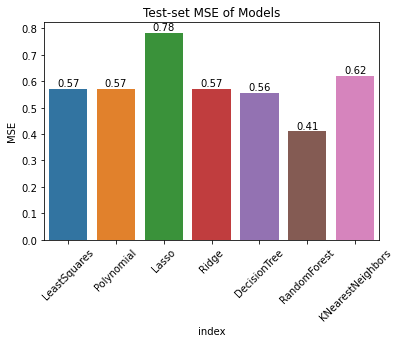

In [21]:
MSE_bar = sns.barplot(data=result_df.reset_index(),x='index',y='MSE')
plt.title('Test-set MSE of Models')
for item in MSE_bar.get_xticklabels():
    item.set_rotation(45)
for index,row in result_df.reset_index().iterrows():
    MSE_bar.text(row.name,row.MSE+0.01,round(row.MSE,2),color='black',ha='center')
plt.show()